<a href="https://colab.research.google.com/github/ham02zah/stock-price-prediction-lstm/blob/main/stock_price_prediction_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [3]:
data = yf.download("AAPL", start="2015-01-01", end="2024-01-01")
close_prices = data[["Close"]]

/tmp/ipython-input-2526715643.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2015-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


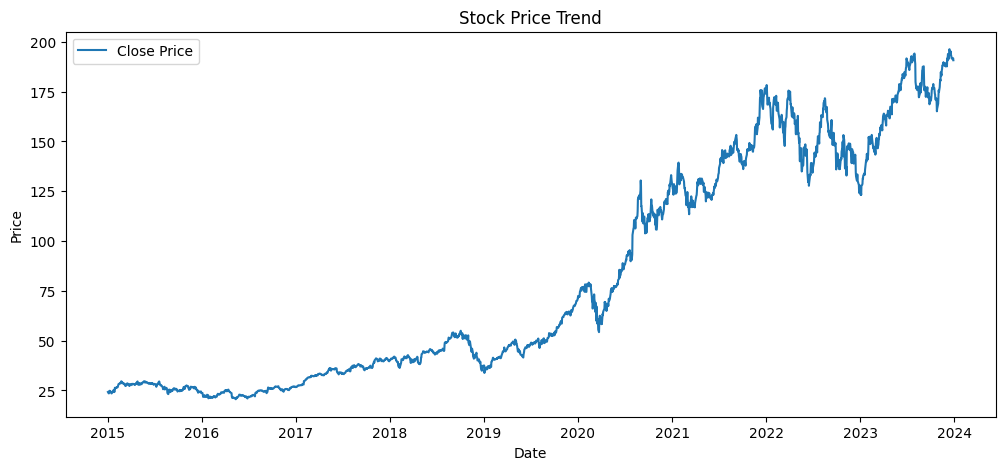

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(close_prices, label="Close Price")
plt.title("Stock Price Trend")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [4]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(close_prices)

X, y = [], []
for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

In [5]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [6]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(60,1)),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0267
Epoch 2/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 4.1188e-04
Epoch 3/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 3.6873e-04
Epoch 4/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 3.3035e-04
Epoch 5/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 3.7137e-04


In [9]:
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
actual = scaler.inverse_transform(y_test.reshape(-1,1))

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step


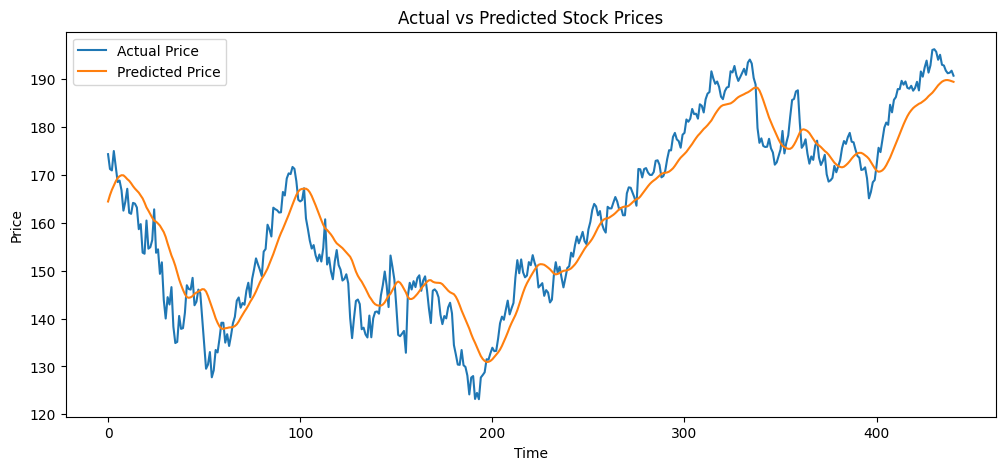

In [10]:
plt.figure(figsize=(12,5))
plt.plot(actual, label="Actual Price")
plt.plot(predicted, label="Predicted Price")
plt.title("Actual vs Predicted Stock Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

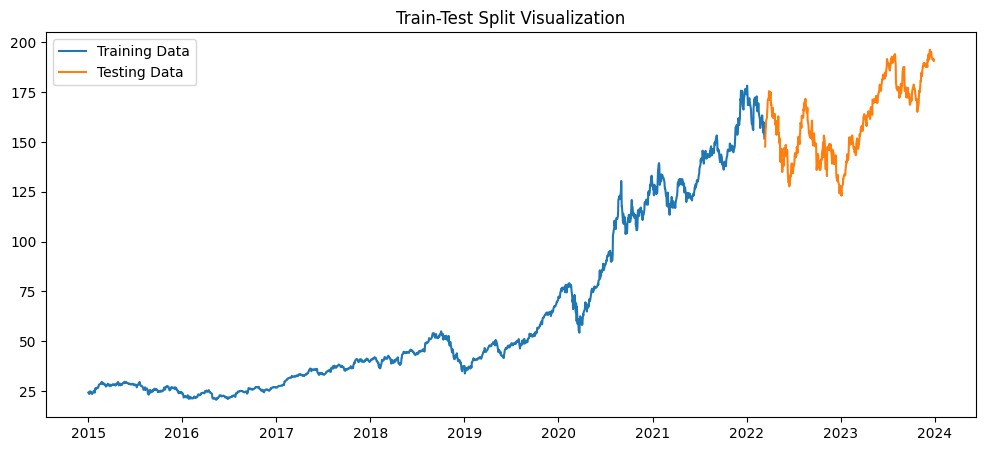

In [11]:
train_size = int(len(close_prices) * 0.8)

plt.figure(figsize=(12,5))
plt.plot(close_prices[:train_size], label="Training Data")
plt.plot(close_prices[train_size:], label="Testing Data")
plt.legend()
plt.title("Train-Test Split Visualization")
plt.show()